# 

# P5 - Convolutioneel neuraal netwerk

###### Door Peter Kemner, 1806201.

In dit notebook ga ik een convoltioneel neuraal netwerk maken om kleuren plaatjes te classificeren van de CIFAR-10 dataset. Deze notebook is het eerste deel van de opdracht waarbij het netwerk is gemaakt zonder aanvullende technieken.

# Opzet notebook

Het notebook heeft de volgende opzet:
- Data formatting,
- Modelling,
- Overfitting,
- Trainen en resultaten,
- Conclusie.

# Data formatting

Ik begin met de data voorbereiden voor het model, dit houdt in:
- data inladen,
- data splitsen,
- data vervormen,
- data veranderen.

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Flatten, Activation, Dense
from tensorflow.keras.optimizers import SGD, Adam, schedules
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data inladen/splitsen

Hier wordt de data ingeladen, de data wordt ook gelijk gesplits in 2 sets. De eerste gaat gebruikt worden om het model op te trainen en laatste is om het model te testen. De shape van de data wordt ook geprint, hieraan kan je zien wat de dementies zijn voor de input van het model en dat de y_train/test nog moet worden aangepast want dat moeten 10 categorieën worden.

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


### Data vervormen

In [3]:
X_train = x_train.astype('float32')         
X_test = x_test.astype('float32')

X_train /= 255                              
X_test /= 255

Hier worden de correcte antwoorden van de train en test set naar 10 veranderd want dat zijn alle mogelijk mogelijkheden. Het maakt de resultaten een array met de lengte 10 en dat is veel handiger om de resultaten van het netwerk te vergelijken.

In [4]:
nb_classes = 10

Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

print(f"Y_train: {Y_train.shape}, Y_test: {Y_test.shape}")

Y_train: (50000, 10), Y_test: (10000, 10)


### Data veranderen

Hier heb ik een deel van de test set gepakt en een beetje gedraait/verplaatst. Dit ga ik gebruiken om te testen of het netwerk de globale patronen heeft geleert en niet alleen van de plaatjes.
bron: https://keras.io/api/preprocessing/image/ en Les_10_Convolutionele_neurale_netwerken_MNIST.ipynb

In [5]:
new_data = ImageDataGenerator(rotation_range=40, shear_range=20)

new_data.fit(X_test)
X_test_augmented, Y_test_augmented = next(new_data.flow(X_test, Y_test, batch_size=X_test.shape[0], shuffle=False))

new_data.fit(X_train)
X_train_augmented, Y_train_augmented = next(new_data.flow(X_train, Y_train, batch_size=X_test.shape[0], shuffle=False))

# Modeling

### De architectuur

De architectuur is als volgt:
- Conv layer,
- Pool layer,
- Conv layer,
- Pool Layer,
- Flatten,
- Dense.

De architectuur in meer detail:
<br>
**1. Conv layer.**

De eerste laag heeft 3 32x32 fotos waar elk van de foto hoort bij de een van de rgb kleuren. Er gaan over de alle fotos in de laag 32 3x3 filters met de relu functie.

**2. Conv layer.**

De tweede laag krijgt de 32 activatie maps van de vorige laag en gaat daar weer met 32 3x3 filters overheen met de relu functie.

**3. Conv layer.**

De derde laag krijgt de 32 activatie maps van de vorige laag en gaat daar weer met 32 3x3 filters overheen met de relu functie.

**4. Max pooling.**

De vierde laag is een pooling layer van 2x2, dit wordt gebruikt om de data te verkleinen en op de belangerijk waardes te focusen.

**5. Conv layer.**

De achtste laag krijgt de verkleinde data van de pooling laag en gaat daar met 64 3x3 filters overheen met de relu functie.

**6. Conv layer.**

De zesde laag krijgt de 64 activatie maps van de vorige laag en gaat daar weer met 64 3x3 filters overheen met de relu functie.

**7. Max pooling.**

De zevende laag is een pooling layer van 2x2, deze verkleint de data weer.

**8. Conv layer.**

De derde laag krijgt de verkleinde data van de pooling laag en gaat daar met 128 3x3 filters overheen met de relu functie.

**9. Flatten.**

Hier word de 3d array geplet naar een 1d array.

**10. Dense**

In deze laag wordt de 1d array van de vorige laag verbonden aan 500 neuronen in deze laag.

**11. Dense**

Dit is de output laag en je er zijn 10 mogelijke opties dus daarom heeft deze laag 10 neuronen.

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu') )

model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu') )

model.add(Conv2D(filters=32, kernel_size=(3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Hier zie je ook nog een overzicht van het model en alle lagen erin.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0

# Overfitting

In deze functie wordt het model getraint met een bepaalt aantal epochs. De resultaten van de train en test set worden opgeslagen en op het eind van de functie geplot.(Dit duurt ongeveer 60 minuten dus ik heb de grafiek eronder geplaatst.)

In [14]:
def plot_overfitting(max_epochs, model):
    # de weights voor het trainen
    initial_weights = model.get_weights()
    train_acc = []
    test_acc = []
    for epoch in range(1, max_epochs + 1):
        # zorgt dat het model niet blijft door trainen van de vorige loop
        model.set_weights(initial_weights)
        model.fit(X_train, Y_train, batch_size = 128, epochs=epoch, verbose=0, validation_split = 0.2, validation_steps=10000//128)
        _, accuracy1 = model.evaluate(X_train, Y_train, verbose=0)
        _, accuracy2 = model.evaluate(X_test, Y_test, verbose=0)
        train_acc.append(accuracy1)
        test_acc.append(accuracy2)
        print("Klaar met aantal epochs: ", epoch)
    
    plt.plot(range(1, max_epochs + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, max_epochs + 1), test_acc, label='Testing Accuracy')
    plt.show()
    model.set_weights(initial_weights)
    
# als je het toch wil runnen, uncommend de volgende regel:
# plot_overfitting(15, model)

Resultaat van de functie:
<br>
De blauwe lijn is de accuracy van de train, de oranje lijn is de accuracy van de test.
<br>
Je kunt zien dat het na 10 epochs de accuracy daalt dus na 10 epochs is het model aan het overfitten.

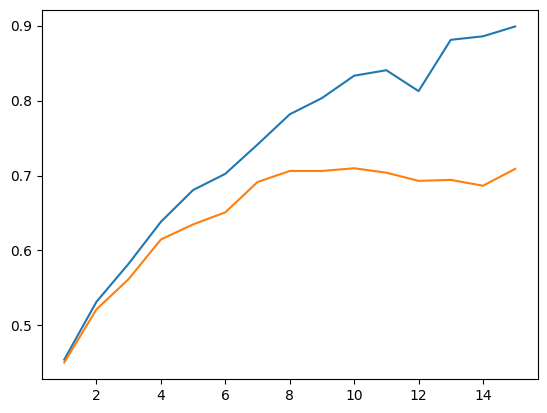

# Trainen en resultaten

### Trainen

Het model wordt hier getraint met de X en y train set. Het aantal epochs is bepaalt door de overfit grafiek die eerder is laten zien. Er wordt ook een standaard validition split gebruikt van 20%, wat zorgt voor een validation steps van 10000//128.

In [9]:
model.fit(X_train, Y_train, batch_size = 128, epochs=10, verbose=1, validation_split = 0.2, validation_steps=10000//128)

Epoch 1/10
313/313 [==============================] - 25s 78ms/step - loss: 2.1312 - accuracy: 0.1848 - val_loss: 1.8485 - val_accuracy: 0.3214
Epoch 2/10
313/313 [==============================] - 25s 81ms/step - loss: 1.6644 - accuracy: 0.3853 - val_loss: 1.5602 - val_accuracy: 0.4296
Epoch 3/10
313/313 [==============================] - 25s 80ms/step - loss: 1.3696 - accuracy: 0.4999 - val_loss: 1.2704 - val_accuracy: 0.5320
Epoch 4/10
313/313 [==============================] - 31s 99ms/step - loss: 1.1954 - accuracy: 0.5680 - val_loss: 1.1864 - val_accuracy: 0.5812
Epoch 5/10
313/313 [==============================] - 24s 76ms/step - loss: 1.0646 - accuracy: 0.6203 - val_loss: 1.0804 - val_accuracy: 0.6149
Epoch 6/10
313/313 [==============================] - 24s 75ms/step - loss: 0.9507 - accuracy: 0.6621 - val_loss: 0.9856 - val_accuracy: 0.6415
Epoch 7/10
313/313 [==============================] - 24s 78ms/step - loss: 0.8435 - accuracy: 0.7005 - val_loss: 0.9585 - val_accuracy:

### Resultaten

Het getrainde model wordt getest met de X en y test set. Daarna wordt de accuracy van het model geprint.

In [10]:
accuracy = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {round(accuracy[1], 4)}")

313/313 [==============================] - 3s 9ms/step - loss: 0.8647 - accuracy: 0.7076
Test accuracy: 0.7076


In [11]:
new_data.fit(X_test)
X_test_augmented, Y_test_augmented = next(new_data.flow(X_test, Y_test, batch_size=10_000))

In [13]:
accuracy = model.evaluate(X_test_augmented, Y_test_augmented)
print(f"Test accuracy: {round(accuracy[1], 4)}")

313/313 [==============================] - 2s 6ms/step - loss: 1.5826 - accuracy: 0.5216
Test accuracy: 0.5216


# Conclusie

Na het trainen heeft het model, is er een accuracy van ongeveer 71% gescored. Het doels was om 67% of hoger te scoren dus mijn model heeft het gehaald. Het model scored voor de veranderde plaatjes dataset rond de 52% wat redelijk is maar het geeft ook aan dat het nog beter kan.